## Clase 6: Integración

Vamos a integrar

La expresión para la integral en el punto $x_i$ en un intervalo simétrico $\pm h$ es:

$$
 \int_{x_i -h}^{x_i + h} f(x) dx= \left(\frac{f_{i-1}+4f{i}+f_{i+1}}{3}\right)h
$$

En caso de tener un intervalo par, hay que sumar: 

$$
 \int_{x_0}^{x_1} f(x) dx= \left(\frac{23f_{0} + 26 f{1} - 4f_{2} + 6 f{3} - 3f_{4}}{48}\right)h
$$

In [2]:
from pylab import *

In [24]:
def integrar(x,y): #funciona para intervalos pares e impares
    
    N, I, h =len(x), 0, x[1]-x[0]
    
    if N%2 == 0: #Si N es par (mod2=0) hay que sumarle un pedazo, si N es impar (mod2=1) el intervalo es simétrico
        #print("Sumar pedacito")
        inicial = 2
        I += (23*y[0] +26*y[1] -4*y[2] +6*y[3] -3*y[4])/16 #el punto inicial aumenta o disminuye el error
    else:
        inicial = 1
        
    #final = N-2 #Python se detiene en el último término pero no lo utiliza
    #for i in range(inicial,final,2): #no está considerando el último valor
    for i in range(inicial,N,2):
            #print("x_i=",x[i],"indice=",i)
        I += y[i-1] + 4*y[i] + y[i+1]
        
    return I*(h/3)

#Recordatorio para ver que la secuencia funciona antes de implementarlo

In [18]:
#x = linspace(0,1,9) #estamos partiendo el intervalo (0,1) en 8 intervalos que nos da 9 indices
#necesitamos que el linspace tenga 5 elementos como mínimo
x = linspace(0,pi,11)
y = sin(x)

#print(x)
integrar(x,y)

2.0001095173150043

Veamos la convergencia de la integral:

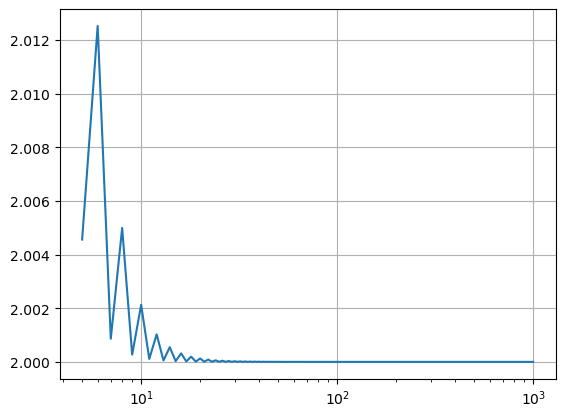

In [35]:
particiones = arange(5,1000)
resultados=zeros(len(particiones)) #para que considere números reales

for i in range(len(particiones)):
    x = linspace(0,pi,particiones[i])
    y = sin(x)
    resultados[i]= integrar(x,y)

#plot(particiones, resultados)
semilogx(particiones,resultados)
#ylim([2,2.01])
grid()
show()